In [2]:
import torch
import torchvision

In [4]:
best_model = torch.jit.load('best_model_cpu_scripted.pt')

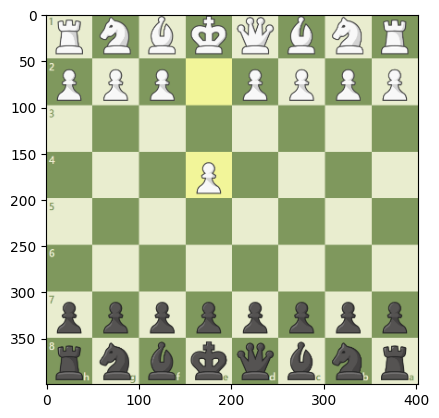

RNBPQB1R/PPP1P1P1/8/3P4/8/8/pppppppp/rnbknbnr


In [8]:
from matplotlib import pyplot as plt
import torchvision.transforms.functional as F
from torchvision.io import read_image

label_to_piece = ['-', 'r', 'n', 'b', 'q', 'k', 'p', 'R', 'N', 'B', 'Q', 'K', 'P']

def board_array_to_fen(board_array):
    fen = ''
    for row in range(8):
        counter = 0
        for col in range(8):
            if board_array[row][col] == '-':
                counter += 1
            else:
                if counter != 0:
                    fen += str(counter)
                    counter = 0
                fen += board_array[row][col]
        if counter != 0:
            fen += str(counter)
            counter = 0
        if row != 7:
            fen += '-'
    return fen

def image_to_predicted_fen(image_tensor):
    board_array = [[' ' for _ in range(8)] for _ in range(8)]

    for row in range(8):
        for col in range(8):
            tile = image_tensor[:, row*50:(row+1)*50, col*50:(col+1)*50].unsqueeze(0).float()
            _, prediction = best_model(tile).max(1)
            board_array[row][col] = label_to_piece[prediction]
    
    return board_array_to_fen(board_array)

img_tensor = read_image('0.png')[:3, :, :]
img_tensor = F.resize(img_tensor, 400)
plt.imshow(img_tensor.permute(1, 2, 0))
plt.show()
print(image_to_predicted_fen(img_tensor).replace('-', '/'))